# Pandas Lightning Talk Demo
We will go over how to use pandas to import and process data related to the novel COVID-19 virus

The first step is to import Pandas
Also include matplotlib inline to show graphs in Pandas

Copyright Nick Piacente, Ziam Ghaznavi, David Cayll

Link to Repo: https://github.com/npiacen/COVID-19-Analysis-with-Pandas-ME369P

Feel free to fork/propose improvements to the visualization!

## Data Source
Johns Hopkins University is compiling COVID-19 data from multiple sources daily.  They publish the raw data on their Github page.  We can find the most recent data at the link below:

https://github.com/CSSEGISandData/COVID-19

We can import the data related to global deaths, confirmed cases, and recovered cases using these links to their data

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import datetime

# formatting for Jupyter Notebook
pd.options.display.max_columns = None
pd.options.display.max_rows = None

deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

Deaths = pd.read_csv(deaths_url)
Confirmed = pd.read_csv(confirmed_url)

type(Confirmed)

# also works
#type(Deaths)


pandas.core.frame.DataFrame

## The data is now contained in a Pandas DataFrame 


In [2]:
Deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,4,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9


### The (minimally processed) DataFrame can be seen below
Sorted by confirmed count max at the latest date

In [3]:
# formatting for Jupyter Notebook
pd.options.display.max_columns = 13
pd.options.display.max_rows = None

# get the most recent data of data
mostRecentDate = Deaths.columns[-1] # gets the columns of the matrix

# try 'Confirmed', 'Deaths'
dataName = 'Confirmed'

data = eval(dataName)

# show the data frame
data.sort_values(by=mostRecentDate, ascending = False).head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
225,NaN,US,37.0902,-95.7129,1,1,...,101657,121478,140886,161807,188172,213372
137,NaN,Italy,43.0000,12.0000,0,0,...,86498,92472,97689,101739,105792,110574
201,NaN,Spain,40.0000,-4.0000,0,0,...,65719,73235,80110,87956,95923,104118
120,NaN,Germany,51.0000,9.0000,0,0,...,50871,57695,62095,66885,71808,77872
62,Hubei,China,30.9756,112.2707,444,444,...,67801,67801,67801,67801,67801,67802
116,NaN,France,46.2276,2.2137,0,0,...,32964,37575,40174,44550,52128,56989
133,NaN,Iran,32.0000,53.0000,0,0,...,32332,35408,38309,41495,44605,47593
223,NaN,United Kingdom,55.3781,-3.4360,0,0,...,14543,17089,19522,22141,25150,29474
206,NaN,Switzerland,46.8182,8.2275,0,0,...,12928,14076,14829,15922,16605,17768
213,NaN,Turkey,38.9637,35.2433,0,0,...,5698,7402,9217,10827,13531,15679


# Show confirmed cases by date for the worst 20 countries

Adding Filters can make the data more meaningful. 
We won't use the Lat/Long data, and need to group the data by country

We can compile final country data using the pivot_table command.

Formatting methods can be daisy chained to combine into a single command

In [4]:
# drop Lat and Long, they won't be needed
countryFrames = data.drop(['Lat','Long'], axis=1)

# save this index variable to save the order.
index = countryFrames.columns.drop(['Province/State']) 

# The pivot_table method will eliminate duplicate entries from Countries with more than one city
countryFrames.pivot_table(index = 'Country/Region', aggfunc = sum)

# formatting using a variety of methods to process and sort data
finalFrame = countryFrames.transpose().reindex(index).transpose().set_index('Country/Region').sort_values(by=mostRecentDate, ascending=False).transpose()

In [5]:
finalFrame

Country/Region,US,Italy,Spain,Germany,China,France,...,Papua New Guinea,Timor-Leste,China,Saint Vincent and the Grenadines,Canada,Canada
1/22/20,1,0,0,0,444,0,...,0,0,0,0,0,0
1/23/20,1,0,0,0,444,0,...,0,0,0,0,0,0
1/24/20,2,0,0,0,549,2,...,0,0,0,0,0,0
1/25/20,2,0,0,0,761,3,...,0,0,0,0,0,0
1/26/20,5,0,0,0,1058,3,...,0,0,0,0,0,0
1/27/20,5,0,0,1,1423,3,...,0,0,0,0,0,0
1/28/20,5,0,0,4,3554,4,...,0,0,0,0,0,0
1/29/20,5,0,0,4,3554,5,...,0,0,0,0,0,0
1/30/20,5,0,0,4,4903,5,...,0,0,1,0,0,0
1/31/20,7,2,0,5,5806,5,...,0,0,1,0,0,0


## We can plot the data for the top 10 countries

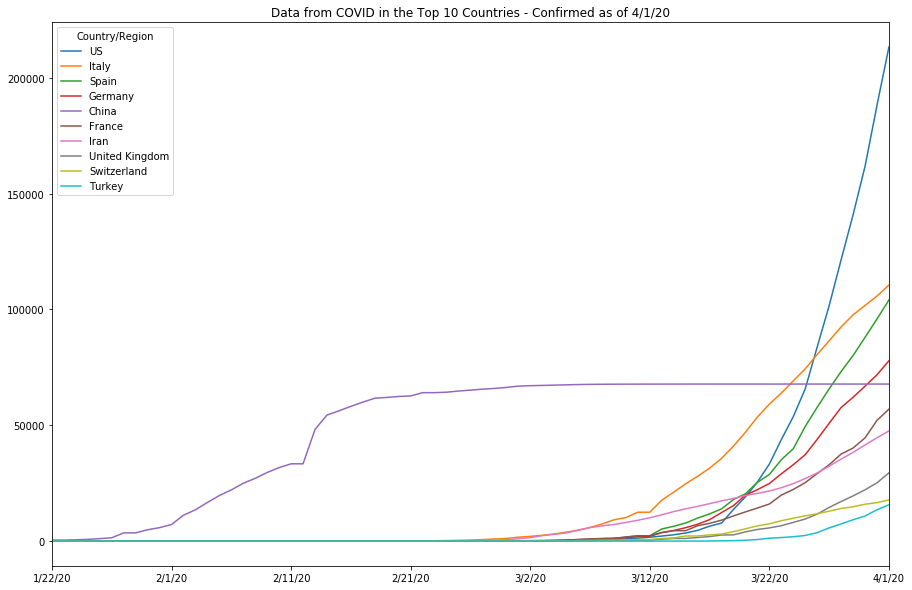

In [6]:
#try other amounts
topAmount = 10
finalFrame.iloc[:, :topAmount].plot(figsize=(15, 10), title = "Data from COVID in the Top {} Countries - {} as of {}".format(topAmount,dataName, mostRecentDate))

# Lets take a look at the most recent US Data 
Existing cases by day are tracked in a different CSV, labeled : 'MM-DD-YYYY.csv' in a different directory from JHU

In [7]:
#date logic
month,day,year = map(int,mostRecentDate.split('/'))
dateFormatted = datetime.date(year+2000,month,day)

dateForURL = dateFormatted.strftime("%m-%d-%Y.csv")
mostRecent_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dateForURL
mostRecentFrame = pd.read_csv(mostRecent_url)

mostRecentFrame

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
5,29001.0,Adair,Missouri,US,2020-04-01 21:58:49,40.190586,-92.600782,3,0,0,0,"Adair, Missouri, US"
6,40001.0,Adair,Oklahoma,US,2020-04-01 21:58:49,35.884942,-94.658593,8,0,0,0,"Adair, Oklahoma, US"
7,8001.0,Adams,Colorado,US,2020-04-01 21:58:49,39.874321,-104.336258,181,2,0,0,"Adams, Colorado, US"
8,17001.0,Adams,Illinois,US,2020-04-01 21:58:49,39.988156,-91.187868,2,0,0,0,"Adams, Illinois, US"
9,18001.0,Adams,Indiana,US,2020-04-01 21:58:49,40.745765,-84.936714,1,0,0,0,"Adams, Indiana, US"


# More Filtering

In [8]:
# filters the dataframe to the criteria below.
state = 'Texas' # try others
data = 'Confirmed' # try 'Deaths', 'Recovered', and 'Active'

frameToPlot = mostRecentFrame.sort_values(by=data, ascending = False).copy()
frameToPlot.rename(columns = {'Combined_Key':'County/State','Admin2':'County'}, inplace = True)

# This creates a true/false table which filters the data
selectedState = frameToPlot['Province_State'] == (state)
selectedCountry = frameToPlot['Country_Region'] == 'US'

frameToPlot[selectedState]

,FIPS,County,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,County/State
838,NaN,Harris,Texas,US,2020-04-01 21:58:49,29.860000,-95.390000,847,6,0,0,"Harris,Texas,US"
515,48113.0,Dallas,Texas,US,2020-04-01 21:58:49,32.766706,-96.777961,731,15,0,0,"Dallas, Texas, US"
1916,48439.0,Tarrant,Texas,US,2020-04-01 21:58:49,32.771438,-97.291016,288,3,0,0,"Tarrant, Texas, US"
1954,48453.0,Travis,Texas,US,2020-04-01 21:58:49,30.334320,-97.785356,244,2,0,0,"Travis, Texas, US"
145,48029.0,Bexar,Texas,US,2020-04-01 21:58:49,29.449287,-98.520197,207,9,0,0,"Bexar, Texas, US"
555,48121.0,Denton,Texas,US,2020-04-01 21:58:49,33.205219,-97.116912,206,4,0,0,"Denton, Texas, US"
439,48085.0,Collin,Texas,US,2020-04-01 21:58:49,33.188201,-96.572644,184,1,0,0,"Collin, Texas, US"
678,48157.0,Fort Bend,Texas,US,2020-04-01 21:58:49,29.527045,-95.772195,163,2,0,0,"Fort Bend, Texas, US"
1382,48339.0,Montgomery,Texas,US,2020-04-01 21:58:49,30.300791,-95.505728,110,2,0,0,"Montgomery, Texas, US"
719,48167.0,Galveston,Texas,US,2020-04-01 21:58:49,29.401673,-94.904691,106,0,0,0,"Galveston, Texas, US"


# Integration with matplotlib
Pandas plots can integrate easily with matplotlib
The following matplot figure is generated with values straight from dataFrames

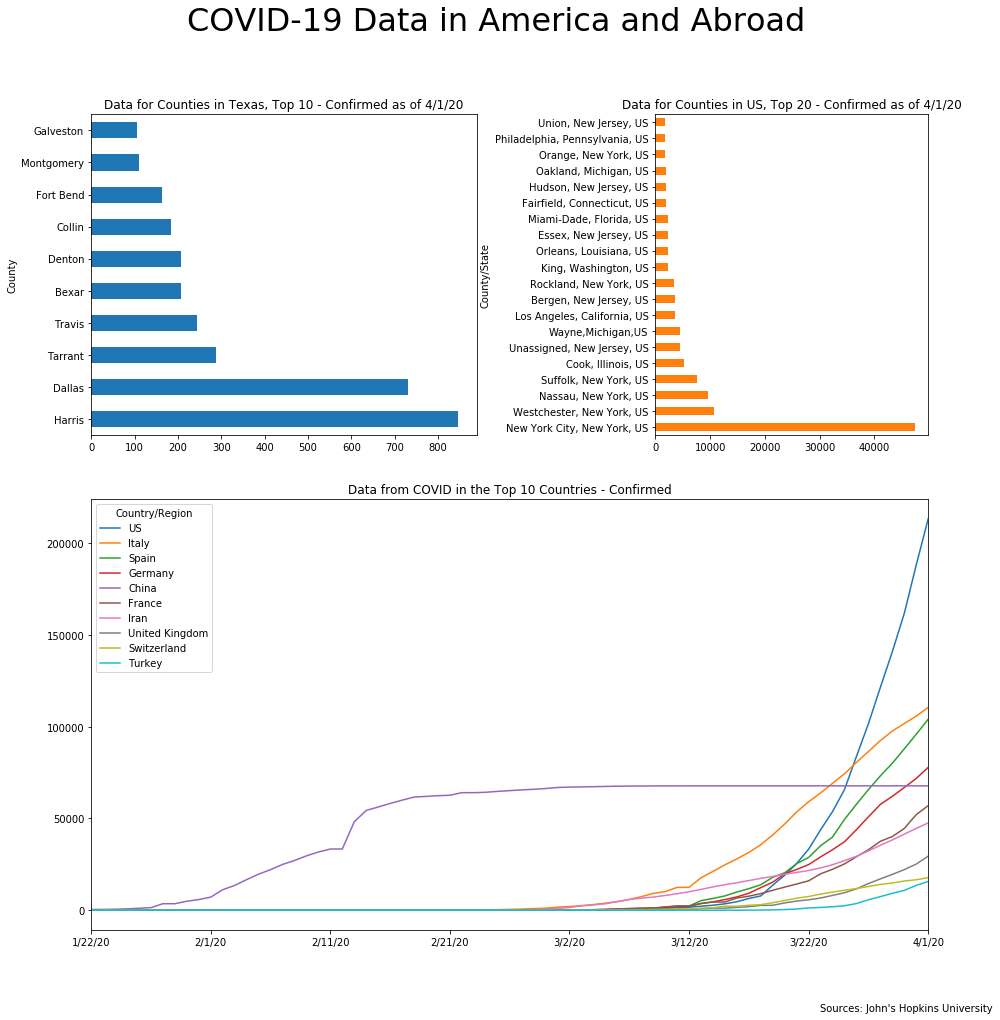

In [9]:
####################################
#######  VISUALIZE THE DATA ########
####################################

fig = plt.figure(figsize = (15,15))
fig.suptitle('COVID-19 Data in America and Abroad', size = 32)
grid_size = (15,15)

# Place A Title On The Figure
fig.text(x=0.8, y=0.05, s='Sources: John\'s Hopkins University', horizontalalignment='left')
# Overlay multiple plots onto the same axis, which spans 1 entire column of the figure
bottom_ax = plt.subplot2grid(grid_size, (7,0), colspan=15, rowspan=8)
upper_left_ax = plt.subplot2grid(grid_size, (0,0), colspan=7, rowspan=6)
upper_right_ax = plt.subplot2grid(grid_size, (0,10), colspan=7, rowspan=6)

frameToPlot[selectedState][:10].plot(ax = upper_left_ax, kind='barh', x = 'County', y = [data], title = 'Data for Counties in {}, Top 10 - {} as of {}'.format(state, data,mostRecentDate), legend = False) 
frameToPlot[selectedCountry][:20].plot(ax = upper_right_ax, kind='barh', x = 'County/State', y = [data], title = 'Data for Counties in US, Top 20 - {} as of {}'.format(data, mostRecentDate), color = 'C1', legend = False) 
finalFrame.iloc[:, :topAmount].plot(ax=bottom_ax, title = "Data from COVID in the Top {} Countries - {}".format(topAmount,dataName))

In [10]:
fig.savefig('COVID-19_Dashboard_{}.jpeg'.format(mostRecentDate.replace('/','_')))